# Mask R-CNN - Inspect Corrosion Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.corrosion import corrosion_2classes as corrosion

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
# CORROSION_WEIGHTS_PATH = "/home/lym/IronErosionDrone/Mask_RCNN-master/logs/corrosion20211129T1704/mask_rcnn_corrosion_0039.h5"  # TODO: update this path
# CORROSION_WEIGHTS_PATH = "/home/lym/IronErosionDrone/Mask_RCNN-master/logs/corrosion20211125T2107/mask_rcnn_corrosion_0039.h5"  # TODO: update this path
CORROSION_WEIGHTS_PATH = "/home/lym/IronErosionDrone/Mask_RCNN-master/logs/corrosion20220302T1607/mask_rcnn_corrosion_0200.h5"  # TODO: update this path


Using TensorFlow backend.


## Configurations

In [14]:
config = corrosion.CorrosionConfig()
CORROSION_DIR = os.path.join(ROOT_DIR, "datasets/corrosion3/train")

In [15]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.display()

## Notebook Preferences

In [16]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [17]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [18]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [19]:
# Set path to corrosion weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
weights_path = CORROSION_WEIGHTS_PATH

# Or, load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /home/lym/IronErosionDrone/Mask_RCNN-master/logs/corrosion20220302T1607/mask_rcnn_corrosion_0200.h5
Re-starting from epoch 200


In [20]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.

    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Run Detection

In [21]:
# load image
from PIL import Image
image_root = "/home/lym/IronErosionDrone/Mask_RCNN-master/datasets/full_data/134_938.jpg"
image = np.array(Image.open(image_root))

# Run object detection
results = model.detect([image], verbose=1)

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


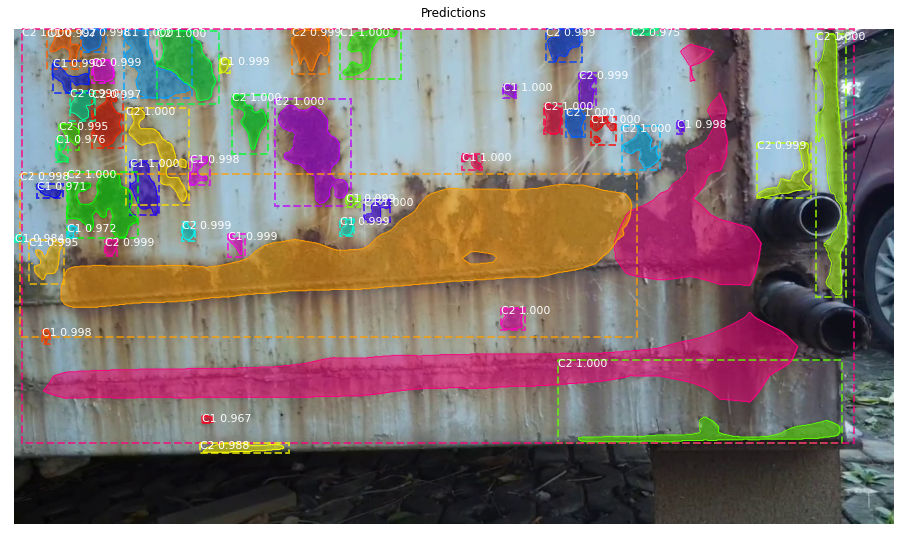

In [22]:
# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            ['BG', 'C1', 'C2'], r['scores'], ax=ax,
                            title="Predictions")


In [23]:
#show origin image
from PIL import Image
img = Image.fromarray(image)
img.convert('RGB')
img.show()

In [24]:
image.shape

(720, 1280, 3)